<a href="https://colab.research.google.com/github/jadhavhemant13780/Deeplerning/blob/main/Copy_of_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression

In [38]:
from warnings import filterwarnings
filterwarnings("ignore")

In [39]:
import pandas as pd
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
df= pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### step 2 AT - Atmospheric Temperature
V - Vaccum Pressure
AP - Atmospheric Pressure
RH - Relative Humidity
PE - Powerplant output in MW (Target)

## Step 2- Perform basic data quality checks

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [41]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [42]:
df.duplicated().sum()

41

## # Remove the duplicate values

In [43]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


## Step 3 - Seperate X and Y(PE)

In [44]:
X = df.drop(columns = ["PE"])
Y = df[["PE"]]

In [45]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [46]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Apply preprocessing on X

In [47]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [49]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [50]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Step 4 - Apply train test split

In [51]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [52]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [53]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [54]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [55]:
ytest.head()


,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [56]:
xtrain.shape

(7621, 4)

In [57]:
xtest.shape

(1906, 4)

In [58]:
xtrain.shape[1]

4

## Step 5 - Training the neural network

In [59]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [60]:
# Initialize the neural network
model = Sequential()

# Create an input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create a hidden layer 1
model.add(Dense(units=8, activation="relu"))

# Create a hidden layer 2
model.add(Dense(units=4, activation="relu"))

# Create a output layer
model.add(Dense(units=1, activation="linear"))

In [61]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [62]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 207112.1094 - mae: 454.7854 - val_loss: 205153.6094 - val_mae: 452.6283
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205223.7969 - mae: 452.7263 - val_loss: 201598.0000 - val_mae: 448.7626
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 200035.1406 - mae: 447.0527 - val_loss: 186376.2031 - val_mae: 431.6141
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179592.5469 - mae: 423.4541 - val_loss: 155265.6406 - val_mae: 392.2805
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 144754.0000 - mae: 377.1036 - val_loss: 118601.3203 - val_mae: 333.6597
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106447.7734 - mae: 311.0721 - val_loss: 90443.6484 - val_mae: 273.9918
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83239.6094 - mae: 259.8871 - val_loss: 73018.6562 - val_mae: 240.4708
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 67528.1172 - mae: 2

In [63]:
hist.history["loss"]

[206692.59375,
 204681.640625,
 196100.953125,
 171808.34375,
 135551.0625,
 101287.8125,
 78479.5859375,
 63569.17578125,
 50274.30078125,
 36998.4765625,
 24469.060546875,
 14045.3515625,
 7406.6142578125,
 4542.78369140625,
 3485.11572265625,
 2910.203857421875,
 2464.91015625,
 2096.541259765625,
 1788.7801513671875,
 1537.089111328125,
 1335.236572265625,
 1171.7186279296875,
 1035.7835693359375,
 920.4391479492188,
 818.4505615234375,
 728.87353515625,
 648.1092529296875,
 574.9366455078125,
 507.98785400390625,
 448.36810302734375,
 393.2608337402344,
 344.7713623046875,
 300.0482482910156,
 260.173095703125,
 224.4893035888672,
 192.53445434570312,
 163.83067321777344,
 138.7061767578125,
 116.79412078857422,
 98.00082397460938,
 81.2670669555664,
 66.90968322753906,
 55.72187042236328,
 46.695682525634766,
 39.788333892822266,
 34.5863037109375,
 30.626279830932617,
 27.8736629486084,
 26.103382110595703,
 24.867794036865234,
 23.987363815307617,
 23.358135223388672,
 22.93103

In [64]:
hist.history["val_loss"]

[205153.609375,
 201598.0,
 186376.203125,
 155265.640625,
 118601.3203125,
 90443.6484375,
 73018.65625,
 59131.20703125,
 45204.359375,
 31476.60546875,
 19201.359375,
 10083.0517578125,
 5421.41455078125,
 3864.8232421875,
 3202.596435546875,
 2712.532958984375,
 2298.247802734375,
 1949.93310546875,
 1660.632080078125,
 1427.300048828125,
 1236.29736328125,
 1085.1671142578125,
 954.498046875,
 847.542724609375,
 751.90185546875,
 665.5388793945312,
 591.0729370117188,
 521.3732299804688,
 455.5174255371094,
 400.3318786621094,
 349.5166320800781,
 304.00823974609375,
 262.2176818847656,
 225.8531951904297,
 193.84481811523438,
 165.12429809570312,
 139.95977783203125,
 117.93495178222656,
 101.09695434570312,
 83.15495300292969,
 69.11054229736328,
 57.92366409301758,
 49.2657470703125,
 41.57743453979492,
 36.213584899902344,
 31.84913444519043,
 28.64423179626465,
 26.59420394897461,
 25.52408790588379,
 24.342330932617188,
 23.461915969848633,
 23.09779167175293,
 22.7510585784

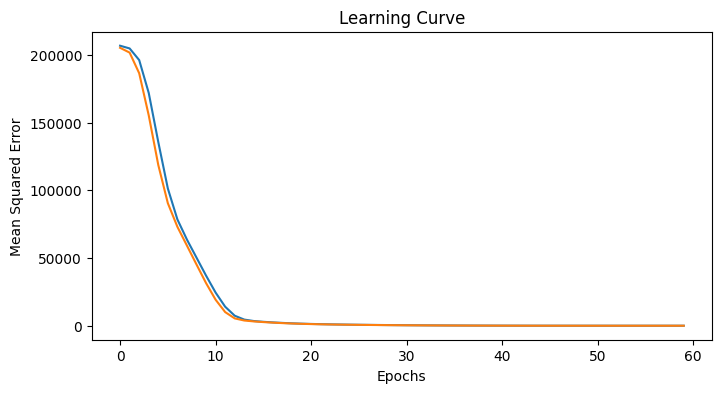

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.show()

## Model evaluation

In [66]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.1497 - mae: 3.6800


[21.369159698486328, 3.673886775970459]

In [67]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.7412 - mae: 3.6685


[22.016565322875977, 3.7534422874450684]

In [68]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [69]:
ypred_test[0:5]

array([[427.63837],
       [480.61798],
       [481.9228 ],
       [450.38   ],
       [448.20734]], dtype=float32)

In [70]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [71]:
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9256531000137329

In [72]:
r2_score(ytest, ypred_test)

0.9270466566085815

## Above has r2 score of 0.92 > 0.8 hence it is a good model

## Out of sample prediction

In [73]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [74]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [76]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [77]:
pred= model.predict(xnew_pre)
pred[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[446.1363 ],
       [440.0189 ],
       [431.93768],
       [440.72708],
       [472.7518 ]], dtype=float32)

In [78]:
xnew["PE_pred"] = pred

In [79]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,446.136292
1,28.88,54.89,1007.16,46.60,440.018890
2,27.89,73.21,1001.32,85.88,431.937683
3,25.69,62.26,1011.38,74.08,440.727081
4,12.16,40.81,1025.79,70.97,472.751801
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,438.115723
96,11.78,39.96,1011.37,82.95,471.620453
97,5.62,41.38,1020.91,86.21,482.939240
98,24.96,74.99,1008.25,80.52,438.069092


In [80]:
xnew.to_csv("Results.csv", index=False)

## Saving the model object

In [81]:
model.save("powerplant.keras")

## Load the model

In [82]:
from keras.models import load_model
nn = load_model("/content/powerplant.keras")
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)